# Multiple Controlled Toffoli Gate

In this notebook, multiple controlled Toffoli gate will be implemented using techniques from Maslov paper [arXiv:1508.03273](https://arxiv.org/abs/1508.03273v2). 

In [1]:
import qiskit
from qiskit import Aer
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import plot_histogram

import numpy as np
import math

%matplotlib inline

The idea is to build 3-bit and 4-bit relative phase Toffoli gate and building up on them to generalize idea of making n-bit Toffoli gate.

From **Definition 2** of the paper, Maslov defined relative phase version of Toffoli gate as multi-controlled Toffoli followed by phase change gate on each of the qubit. Formally defined as matrix with 

$$diag\big\{ z_0, z_1, z_2, ..., z_{2^n-3}, \begin{pmatrix} 0 & z_{2^{n-2}} \\ z_{2^{n-1}} & 0 \end{pmatrix} \big\}$$

where $||z|| = 1$

putting it into picture, RTOF-3 would be like the circuit below where U3 only change the phase and nothing else

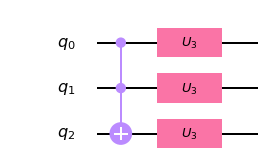

In [2]:
qc = QuantumCircuit(3)
qc.ccx(0, 1, 2)
a = b = c = np.pi # just a dummy to make U3 not showing the value
qc.u3(a, b, c, 0)
qc.u3(a, b, c, 1)
qc.u3(a, b, c, 2)
qc.draw(output='mpl')

But the interesting part is from **Definition 3**, he defined *special form relative phase multiple control Toffoli gate* $S^{X'} RTOF$ similar to the normal relative phase Toffoli but with a stricter version on the followed phase change gates. The set $X'$ refers to the ith-qubit (or in the paper the ith digit in the binary expansion) where every pair of complex number $z_s$ and $z_t$ are equal if the binary expansions of $s$ and $t$ are different only in those digits. 

What it means is that it is equivalent to **no phase change gates followed after Toffoli for those bits in $X$**

To give an example, a type-{$x_2$} example of the $S^{x_2} RTOF$ would be like the circuit illustrated below

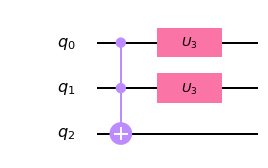

In [3]:
qc = QuantumCircuit(3)
qc.ccx(0, 1, 2)
a = b = c = np.pi # just a dummy to make U3 not showing the value
qc.u3(a, b, c, 0)
qc.u3(a, b, c, 1)
qc.draw(output='mpl')

**keep in mind that the circuit illustrated earlier is the equivalent form and not how the real implementation of the relative phase version of Toffoli would be**

## Core component of building multi-controlled Toffoli

In [4]:
def RTL(qc, a, b, c):
    ## fig 3 dashed
    qc.rccx(a, b, c)
    
def RTL_inv(qc, a, b, c):
    RTL(qc, a, b, c)

In [5]:
def RTS(qc, a, b, c):
    ## fig 3 gates 2-6
    qc.h(c)
    qc.t(c)
    qc.cx(b, c)
    qc.tdg(c)
    qc.cx(a, c)
    
def RTS_inv(qc, a, b, c):
    qc.cx(a, c)
    qc.t(c)
    qc.cx(b, c)
    qc.tdg(c)
    qc.h(c)

In [6]:
def SRTS(qc, a, b, c):
    ## circuit 3 dashed
    qc.h(c)
    qc.cx(c, b)
    qc.tdg(b)
    qc.cx(a, b)
    qc.t(b)
    qc.cx(c, b)
    qc.tdg(b)
    qc.cx(a, b)
    qc.t(b)
    
def SRTS_inv(qc, a, b, c):
    qc.tdg(b)
    qc.cx(a, b)
    qc.t(b)
    qc.cx(c, b)
    qc.tdg(b)
    qc.cx(a, b)
    qc.t(b)
    qc.cx(c, b)
    qc.h(c)

In [7]:
def RT4L(qc, a, b, c, d):
    ## fig 4
    qc.rcccx(a, b, c, d)
    
def RT4L_inv(qc, a, b, c, d):
    qc.h(d)
    qc.t(d)
    qc.cx(c, d)
    qc.tdg(d)
    qc.h(d)
    qc.t(d)
    qc.cx(b, d)
    qc.tdg(d)
    qc.cx(a, d)
    qc.t(d)
    qc.cx(b, d)
    qc.tdg(d)
    qc.cx(a, d)
    qc.h(d)
    qc.t(d)
    qc.cx(c, d)
    qc.tdg(d)
    qc.h(d)

In [8]:
def RT4S(qc, a, b, c, d):
    ## fig 4 dashed
    qc.h(d)
    qc.t(d)
    qc.cx(c, d)
    qc.tdg(d)
    qc.h(d)
    qc.cx(a, d)
    qc.t(d)
    qc.cx(b, d)
    qc.tdg(d)
    qc.cx(a, d)
    
def RT4S_inv(qc, a, b, c, d):
    qc.cx(a, d)
    qc.t(d)
    qc.cx(b, d)
    qc.tdg(d)
    qc.cx(a, d)
    qc.h(d)
    qc.t(d)
    qc.cx(c, d)
    qc.tdg(d)
    qc.h(d)

let's visualize each gate using `circuit.draw()`

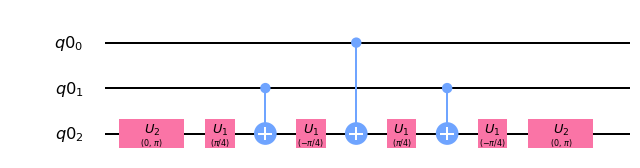

In [9]:
qr = QuantumRegister(3)
qc = QuantumCircuit(qr)
RTL(qc, qr[0], qr[1], qr[2])
qc.draw(output='mpl')

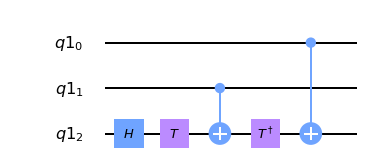

In [10]:
qr = QuantumRegister(3)
qc = QuantumCircuit(qr)
RTS(qc, qr[0], qr[1], qr[2])
qc.draw(output='mpl')

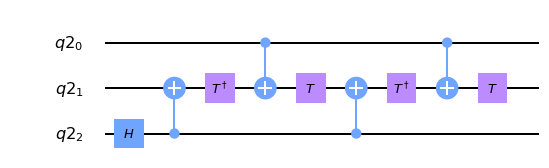

In [11]:
qr = QuantumRegister(3)
qc = QuantumCircuit(qr)
SRTS(qc, qr[0], qr[1], qr[2])
qc.draw(output='mpl')

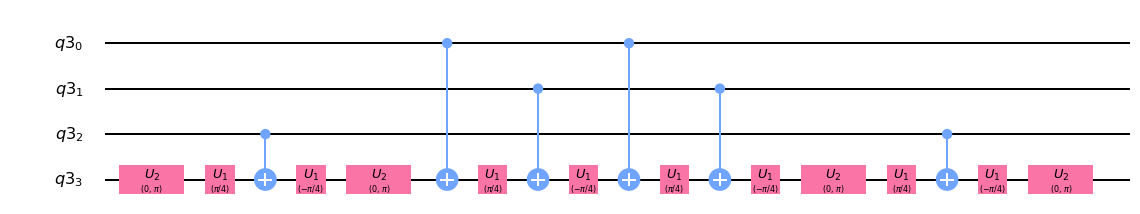

In [12]:
qr = QuantumRegister(4)
qc = QuantumCircuit(qr)
RT4L(qc, qr[0], qr[1], qr[2], qr[3])
qc.draw(output='mpl')

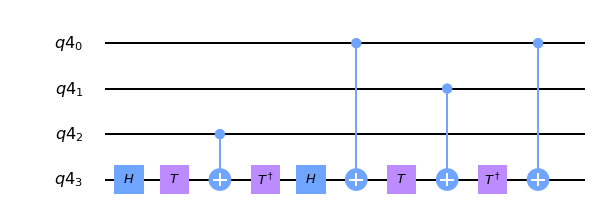

In [13]:
qr = QuantumRegister(4)
qc = QuantumCircuit(qr)
RT4S(qc, qr[0], qr[1], qr[2], qr[3])
qc.draw(output='mpl')

In [26]:
def apply_n_cnot_dirty_ancilla(qc, controls, target, anc):
    """
    multi-controlled toffoli for when controls >= 4
    len(anc) must be at least ceil((len(controls)-2)/2)
    """
    # TODO: check whether received params are correct type
    if len(anc) < math.ceil((len(controls)-2)/2):
        raise ValueError('not enough ancilla bits, need {} ancilla for {} controls; given {}'
                .format(math.ceil((len(controls)-2)/2), len(controls), len(anc)))
        
    def _inner_v_chain():
        nonlocal qc, controls, target, anc
        
        anc_idx = len(anc) - 1
        for i in range((len(controls)-4)//2):
            RT4S(qc, anc[anc_idx-1], controls[-2-2*i], controls[-2-2*i-1], anc[anc_idx])
            qc.barrier()
            anc_idx -= 1

        if len(controls)%2 == 1:
            RTS(qc, anc[0], controls[3], anc[1])
            qc.barrier()
            
        RT4L(qc, controls[0], controls[1], controls[2], anc[0])
        qc.barrier()
        
        if len(controls)%2 == 1:
            RTS_inv(qc, anc[0], controls[3], anc[1])
            qc.barrier()

        anc_idx += 1
        for i in reversed(range((len(controls)-4)//2)):
            RT4S_inv(qc, anc[anc_idx-1], controls[-2-2*i], controls[-2-2*i-1], anc[anc_idx])
            qc.barrier()
            anc_idx += 1
    
    SRTS(qc, controls[-1], anc[-1], target)
    qc.barrier()
    _inner_v_chain()
    SRTS_inv(qc, controls[-1], anc[-1], target)
    qc.barrier()
    _inner_v_chain()
    
def apply_n_cnot_clean_ancilla(qc, controls, target, anc):
    pass
        
    
def apply_n_cnot_no_ancilla(qc, controls, target):
    pass

In [ ]:
def n_cnot(self, controls, target, clean_ancilla=None, dirty_ancilla=None):
    """this is the general function for applying toffoli gate"""
    
    if len(controls) == 1:
        self.cx(controls[0], target)
        return
    elif len(controls) == 2:
        self.ccx(controls[0], controls[1], target)
        return

    # TODO: error checking
    
    if clean_ancilla is not None:
        if math.ceil((len(controls) - 2) / 2) <= len(clean_ancilla):
            apply_n_cnot_clean_ancilla(self, controls, target, clean_ancilla)
            return
        
        n = len(controls) - len(clean_ancilla) * 3
        if math.ceil((n-2)/2) <= len(dirty_ancilla):
            for i in range(len(clean_ancilla)):
                RT4L(self, controls[3*i], controls[3*i+1], controls[3*i+2], anc[i])

            _controls = controls[3*len(clean_ancilla):] + clean_ancilla[:]
            apply_n_cnot_dirty_ancilla(self, _controls, target, dirty_ancilla)

            for i in reversed(range(len(clean_ancilla))):
                RT4L_inv(self, controls[3*i], controls[3*i+1], controls[3*i+2], anc[i])
        else:
            for i in range(len(clean_ancilla)-1):
                RT4L(self, controls[3*i], controls[3*i+1], controls[3*i+2], anc[i])

            _controls = controls[3*len(clean_ancilla)-3:] + clean_ancilla[:-1]
            # TODO: apply Corollary 3

            for i in reversed(range(len(clean_ancilla)-1)):
                RT4L_inv(self, controls[3*i], controls[3*i+1], controls[3*i+2], anc[i])
        
    elif dirty_ancilla is not None:
        if math.ceil((len(_controls) - 2) / 2) <= len(dirty_ancilla):
            apply_n_cnot_dirty_ancilla(self, _controls, target, dirty_ancilla)
            
    else:
        apply_n_cnot_no_ancilla(self, controls, target)

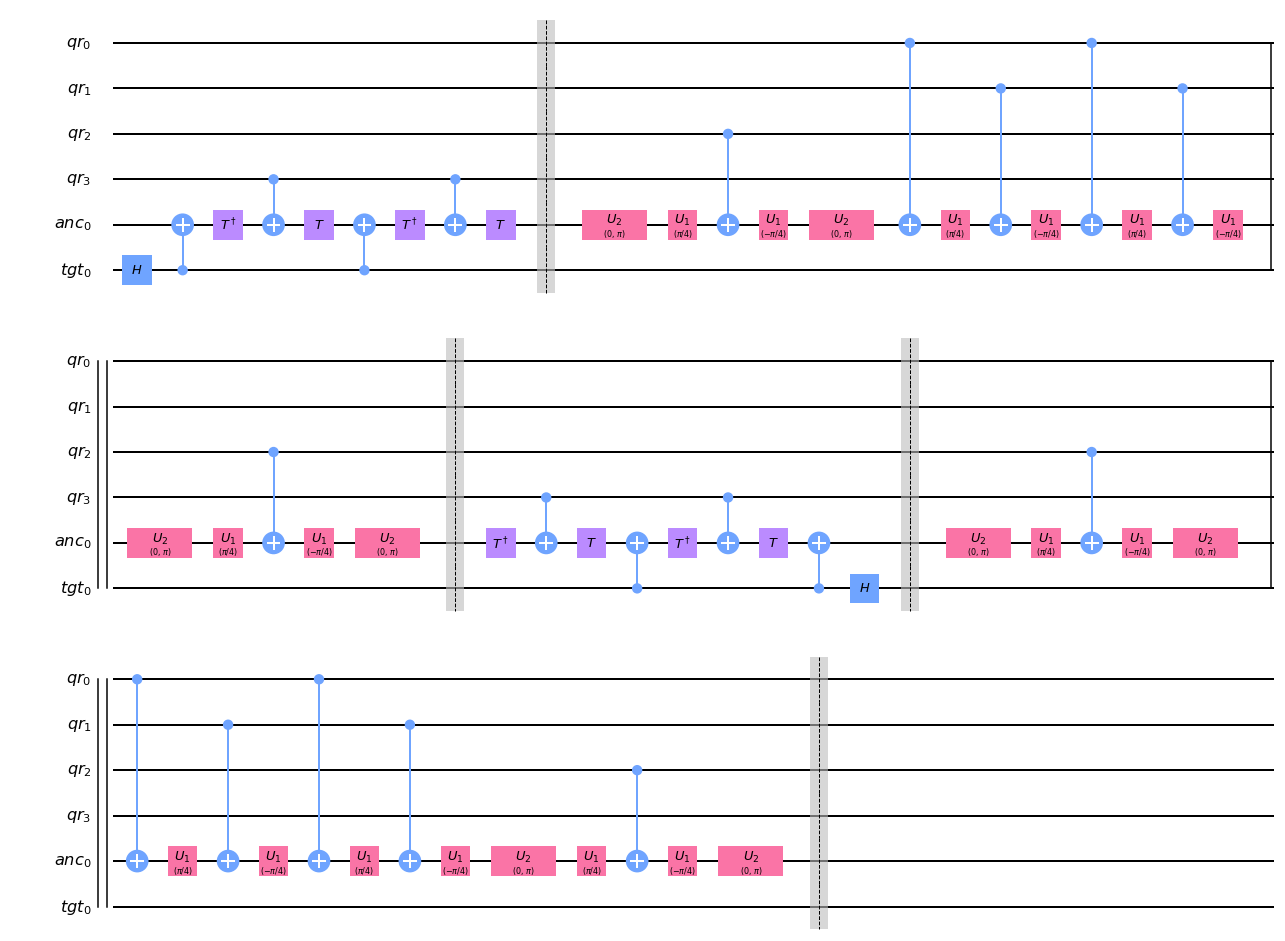

In [23]:
import math
n = 5
qr = QuantumRegister(n-1, 'qr')
anc = QuantumRegister(int(math.ceil((n-3)/2)), 'anc')
tgt = QuantumRegister(1, 'tgt')
qc = QuantumCircuit(qr, anc, tgt)
apply_n_cnot_dirty_ancilla(qc, qr, tgt[0], anc)
qc.draw(output='mpl')